# Movie Recommendation System – Dynamix Networks Internship

## 1. Import Libraries & Load Dataset


In [1]:
# Step 1: Import required libraries
import pandas as pd

In [2]:
# Step 2: Load all 4 CSV files

# Ratings: userId, movieId, rating, timestamp
ratings = pd.read_csv('/content/ratings.csv')

# Movies: movieId, title, genres
movies = pd.read_csv('/content/movies.csv')

# Tags: userId, movieId, tag, timestamp
tags = pd.read_csv('/content/tags.csv')

# Links: movieId, imdbId, tmdbId
links = pd.read_csv('/content/links.csv')

print("✅ Files loaded successfully!")

✅ Files loaded successfully!


In [3]:
print("Ratings data:")
print(ratings.head())
print("Shape:", ratings.shape)

print("\nMovies data:")
print(movies.head())
print("Shape:", movies.shape)

print("\nTags data:")
print(tags.head())
print("Shape:", tags.shape)

print("\nLinks data:")
print(links.head())
print("Shape:", links.shape)


Ratings data:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
Shape: (100836, 4)

Movies data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Shape: (9742, 3)

Tags data:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1    

## 2. Data Understanding & Preprocessing

In [4]:
print("Ratings info:")
print(ratings.info())

print("\nMovies info:")
print(movies.info())

print("\nTags info:")
print(tags.info())

print("\nLinks info:")
print(links.info())


Ratings info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Movies info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Tags info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3

In [5]:
print("Missing values in ratings:")
print(ratings.isnull().sum())

print("\nMissing values in movies:")
print(movies.isnull().sum())

print("\nMissing values in tags:")
print(tags.isnull().sum())

print("\nMissing values in links:")
print(links.isnull().sum())


Missing values in ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in movies:
movieId    0
title      0
genres     0
dtype: int64

Missing values in tags:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing values in links:
movieId    0
imdbId     0
tmdbId     8
dtype: int64


In [6]:
# Convert timestamp columns to datetime for better readability

# For ratings
ratings['rating_datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')

# For tags (only if tags is not empty)
if not tags.empty:
    tags['tag_datetime'] = pd.to_datetime(tags['timestamp'], unit='s')

print("✅ Converted timestamp to datetime.")
print(ratings[['userId', 'movieId', 'rating', 'timestamp', 'rating_datetime']].head())


✅ Converted timestamp to datetime.
   userId  movieId  rating  timestamp     rating_datetime
0       1        1     4.0  964982703 2000-07-30 18:45:03
1       1        3     4.0  964981247 2000-07-30 18:20:47
2       1        6     4.0  964982224 2000-07-30 18:37:04
3       1       47     5.0  964983815 2000-07-30 19:03:35
4       1       50     5.0  964982931 2000-07-30 18:48:51


In [7]:
# Merge ratings with movie titles & genres
ratings_movies = pd.merge(ratings, movies, on='movieId', how='left')

print("✅ Merged ratings with movies.")
print(ratings_movies.head())
print("Shape:", ratings_movies.shape)


✅ Merged ratings with movies.
   userId  movieId  rating  timestamp     rating_datetime  \
0       1        1     4.0  964982703 2000-07-30 18:45:03   
1       1        3     4.0  964981247 2000-07-30 18:20:47   
2       1        6     4.0  964982224 2000-07-30 18:37:04   
3       1       47     5.0  964983815 2000-07-30 19:03:35   
4       1       50     5.0  964982931 2000-07-30 18:48:51   

                         title                                       genres  
0             Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy  
1      Grumpier Old Men (1995)                               Comedy|Romance  
2                  Heat (1995)                        Action|Crime|Thriller  
3  Seven (a.k.a. Se7en) (1995)                             Mystery|Thriller  
4   Usual Suspects, The (1995)                       Crime|Mystery|Thriller  
Shape: (100836, 7)


In [8]:
# Create a list of genres for each movie
movies['genres_list'] = movies['genres'].apply(lambda x: x.split('|') if isinstance(x, str) else [])

print("✅ Created genres_list column.")
print(movies[['movieId', 'title', 'genres', 'genres_list']].head())


✅ Created genres_list column.
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                         genres_list  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]  


## 3. Exploratory Data Analysis (EDA)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')  # clean style


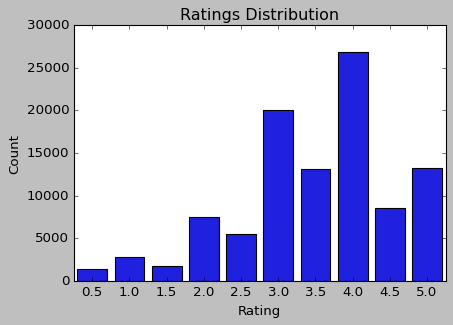

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=ratings)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


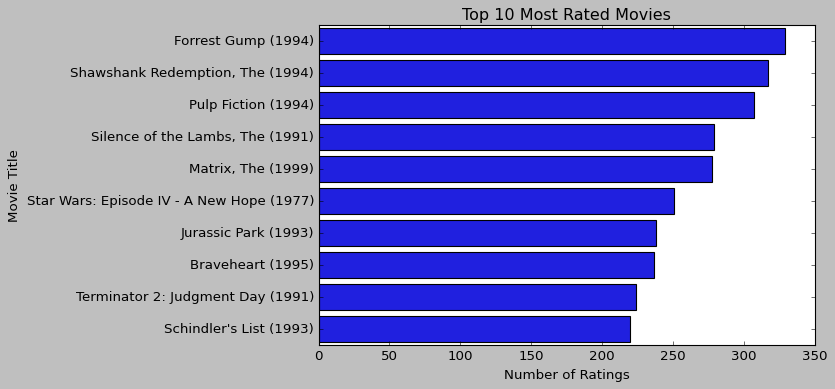

In [11]:
top_rated = ratings_movies['title'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_rated.index, x=top_rated.values)
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()


In [12]:
# Count ratings per movie
movie_rating_counts = ratings_movies.groupby('title')['rating'].count()

# Mean rating per movie
movie_rating_means = ratings_movies.groupby('title')['rating'].mean()

# Combine
movie_stats = pd.DataFrame({
    'rating_count': movie_rating_counts,
    'average_rating': movie_rating_means
})

# Filter: movies with at least 50 ratings
popular_movies = movie_stats[movie_stats['rating_count'] >= 50]

# Sort top movies by average rating
top_movies = popular_movies.sort_values('average_rating', ascending=False).head(10)

top_movies


,rating_count,average_rating
title,,
"Shawshank Redemption, The (1994)",317,4.429022
"Godfather, The (1972)",192,4.289062
Fight Club (1999),218,4.272936
Cool Hand Luke (1967),57,4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),97,4.268041
Rear Window (1954),84,4.261905
"Godfather: Part II, The (1974)",129,4.259690
"Departed, The (2006)",107,4.252336
Goodfellas (1990),126,4.250000


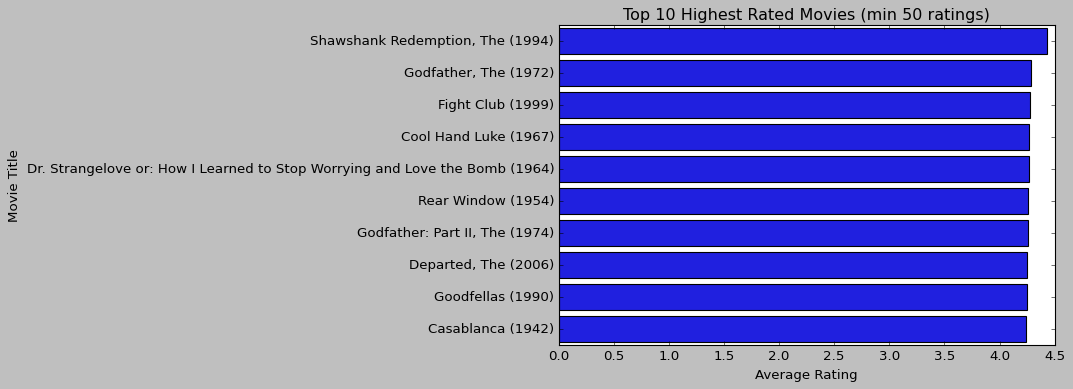

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_movies['average_rating'], y=top_movies.index)
plt.title("Top 10 Highest Rated Movies (min 50 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()


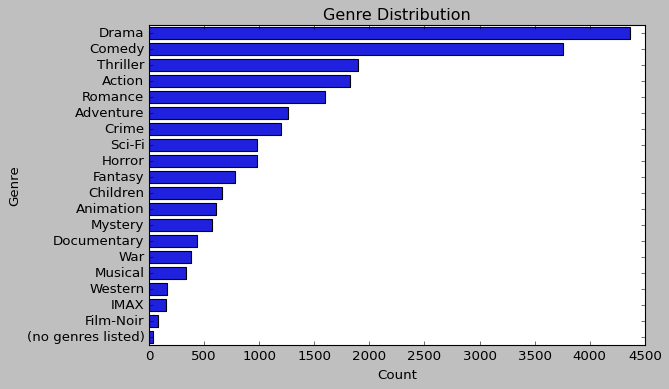

In [14]:
# Count genres
genre_counts = {}

for genres in movies['genres_list']:
    for g in genres:
        if g not in genre_counts:
            genre_counts[g] = 0
        genre_counts[g] += 1

# Convert to DataFrame
genre_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values('Count', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Genre', data=genre_df)
plt.title("Genre Distribution")
plt.show()


## 4. Collaborative Filtering – Item-Based

In [15]:
# Create user-item matrix (rows = users, columns = movies)
user_item_matrix = ratings_movies.pivot_table(
    index='userId',
    columns='movieId',
    values='rating'
)

print("Matrix shape:", user_item_matrix.shape)
user_item_matrix.head()


Matrix shape: (610, 9724)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
user_item_matrix_filled = user_item_matrix.fillna(0)
print("Filled matrix ready!")
user_item_matrix_filled.head()


Filled matrix ready!


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between movies
movie_similarity = cosine_similarity(user_item_matrix_filled.T)

print("Similarity matrix shape:", movie_similarity.shape)


Similarity matrix shape: (9724, 9724)


In [18]:
import numpy as np

movie_similarity_df = pd.DataFrame(
    movie_similarity,
    index=user_item_matrix_filled.columns,
    columns=user_item_matrix_filled.columns
)

movie_similarity_df.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
def recommend_similar_movies(movie_title, n=10):
    # Step 1: Find movieId
    movie_row = movies[movies['title'].str.lower() == movie_title.lower()]

    if movie_row.empty:
        return f"❌ Movie '{movie_title}' not found."

    movie_id = movie_row.iloc[0]['movieId']

    # Step 2: Get similarity scores for this movie
    if movie_id not in movie_similarity_df.index:
        return f"❌ No similarity data for '{movie_title}'."

    scores = movie_similarity_df[movie_id]

    # Step 3: Sort scores
    similar_movie_ids = scores.sort_values(ascending=False).iloc[1:n+1].index

    # Step 4: Map back to titles
    recommended_titles = movies[movies['movieId'].isin(similar_movie_ids)]['title'].values

    return recommended_titles


In [20]:
recommend_similar_movies("Toy Story (1995)", n=5)


array(['Star Wars: Episode IV - A New Hope (1977)', 'Forrest Gump (1994)',
       'Jurassic Park (1993)', 'Independence Day (a.k.a. ID4) (1996)',
       'Toy Story 2 (1999)'], dtype=object)

## 5. Content-Based Recommendation (Genres + Tags)

In [21]:
# Some movies may have no tags at all, that's okay.
# Step 5A: Group tags by movie and join them into one string per movie

tags_grouped = tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x.astype(str))).reset_index()

print("✅ Combined tags per movie:")
tags_grouped.head()


✅ Combined tags per movie:


,movieId,tag
0,1,pixar pixar fun
1,2,fantasy magic board game Robin Williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake


In [22]:
# Merge movies with grouped tags
movies_content = pd.merge(
    movies[['movieId', 'title', 'genres']],
    tags_grouped,
    on='movieId',
    how='left'  # keep all movies, even if no tags
)

# Replace NaN tags with empty string
movies_content['tag'] = movies_content['tag'].fillna('')

# Prepare a combined text column: genres + tags
movies_content['genres_clean'] = movies_content['genres'].apply(
    lambda x: x.replace('|', ' ') if isinstance(x, str) else ''
)

movies_content['content'] = movies_content['genres_clean'] + " " + movies_content['tag']

print("✅ Created content text for each movie")
movies_content[['movieId', 'title', 'genres', 'tag', 'content']].head()


✅ Created content text for each movie


,movieId,title,genres,tag,content
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar pixar fun,Adventure Animation Children Comedy Fantasy pi...
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy magic board game Robin Williams game,Adventure Children Fantasy fantasy magic board...
2,3,Grumpier Old Men (1995),Comedy|Romance,moldy old,Comedy Romance moldy old
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake,Comedy pregnancy remake


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 5B: Create TF-IDF matrix from the 'content' column
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(movies_content['content'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (9742, 1677)


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

content_similarity = cosine_similarity(tfidf_matrix)

print("Content similarity matrix shape:", content_similarity.shape)


Content similarity matrix shape: (9742, 9742)


In [25]:
# Make sure movieId is the index for movies_content
movies_content = movies_content.set_index('movieId')

content_similarity_df = pd.DataFrame(
    content_similarity,
    index=movies_content.index,
    columns=movies_content.index
)

content_similarity_df.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.088077,0.013492,0.048353,0.016330,0.0,0.022183,0.234115,0.0,0.093938,...,0.062163,0.166784,0.070332,0.184905,0.0,0.243658,0.270723,0.00000,0.150841,0.095768
2,0.088077,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.179824,0.0,0.072154,...,0.000000,0.000000,0.000000,0.000000,0.0,0.152854,0.169832,0.00000,0.000000,0.000000
3,0.013492,0.000000,1.000000,0.218274,0.024022,0.0,0.100139,0.000000,0.0,0.000000,...,0.031930,0.000000,0.103463,0.000000,0.0,0.044854,0.049836,0.00000,0.000000,0.140881
4,0.048353,0.000000,0.218274,1.000000,0.086093,0.0,0.358887,0.000000,0.0,0.000000,...,0.114433,0.201463,0.687501,0.000000,0.0,0.160752,0.178608,0.46662,0.000000,0.504900
5,0.016330,0.000000,0.024022,0.086093,1.000000,0.0,0.654423,0.000000,0.0,0.000000,...,0.038646,0.000000,0.125226,0.000000,0.0,0.054289,0.060319,0.00000,0.000000,0.170515


In [26]:
def recommend_by_content(movie_title, n=10):
    # Step 1: find movieId from title
    movie_row = movies_content[movies_content['title'].str.lower() == movie_title.lower()]

    if movie_row.empty:
        return f"❌ Movie '{movie_title}' not found in movies_content."

    movie_id = movie_row.index[0]

    # Step 2: get similarity scores for that movie
    if movie_id not in content_similarity_df.index:
        return f"❌ No content similarity data for '{movie_title}'."

    scores = content_similarity_df[movie_id]

    # Step 3: sort scores and pick top n (skip itself)
    similar_movie_ids = scores.sort_values(ascending=False).iloc[1:n+1].index

    # Step 4: map IDs back to titles
    recommended_titles = movies.loc[movies['movieId'].isin(similar_movie_ids), 'title'].values

    return recommended_titles


In [27]:
recommend_by_content("Toy Story (1995)", n=5)


array(["Bug's Life, A (1998)", 'Toy Story 2 (1999)',
       'Adventures of Rocky and Bullwinkle, The (2000)', 'Turbo (2013)',
       'Guardians of the Galaxy 2 (2017)'], dtype=object)

## 6. Evaluation (Train/Test + RMSE)

In [28]:
from sklearn.model_selection import train_test_split

# Split ratings into 80% train, 20% test
train_ratings, test_ratings = train_test_split(
    ratings,
    test_size=0.2,
    random_state=42
)

print("Train shape:", train_ratings.shape)
print("Test shape:", test_ratings.shape)


Train shape: (80668, 5)
Test shape: (20168, 5)


In [29]:
# Global mean rating (if a movie has no history in train)
global_mean = train_ratings['rating'].mean()

# Mean rating per movie (based on train set)
movie_mean_rating = train_ratings.groupby('movieId')['rating'].mean()

print("Global mean rating:", global_mean)
movie_mean_rating.head()


Global mean rating: 3.502572271532702


,rating
movieId,
1,3.893678
2,3.373626
3,3.162500
4,2.250000
5,2.955882


In [30]:
import numpy as np

def predict_rating(movie_id):
    # If movie has mean rating in train, use it
    if movie_id in movie_mean_rating.index:
        return movie_mean_rating.loc[movie_id]
    # Otherwise, fall back to global average
    else:
        return global_mean

# Apply prediction to all rows in test set
test_ratings['predicted_rating'] = test_ratings['movieId'].apply(predict_rating)

test_ratings[['userId', 'movieId', 'rating', 'predicted_rating']].head()


,userId,movieId,rating,predicted_rating
67037,432,77866,4.5,2.900000
42175,288,474,3.0,3.754386
93850,599,4351,3.0,3.250000
6187,42,2987,4.0,3.578947
12229,75,1610,4.0,3.801370


In [31]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(
    mean_squared_error(
        test_ratings['rating'],
        test_ratings['predicted_rating']
    )
)

print("✅ Baseline Model RMSE (movie mean):", rmse)


✅ Baseline Model RMSE (movie mean): 0.9827389937822489


## 7. Personalized User Recommendations

In [32]:
# Create a helper mapping from movieId to title
movie_id_to_title = movies.set_index('movieId')['title'].to_dict()

def get_movie_title(movie_id):
    return movie_id_to_title.get(movie_id, "Unknown Movie")


In [33]:
import numpy as np
import pandas as pd

def recommend_for_user(user_id, n=10):
    # Check if user exists
    if user_id not in user_item_matrix_filled.index:
        return f"❌ User {user_id} not found."

    # Get this user's ratings vector (one row of the matrix)
    user_ratings = user_item_matrix_filled.loc[user_id]

    # Movies the user has already rated (rating > 0)
    already_rated = user_ratings[user_ratings > 0].index.tolist()

    if len(already_rated) == 0:
        return f"❌ User {user_id} has no ratings."

    # Convert to numpy arrays for faster math
    user_ratings_values = user_ratings.values  # shape: (num_movies,)
    similarity_matrix_values = movie_similarity_df.values  # shape: (num_movies, num_movies)

    # Numerator: similarity_matrix * user_ratings
    numerator = similarity_matrix_values.dot(user_ratings_values)

    # Denominator: sum of similarities only for movies the user rated
    # Create a mask: 1 for rated movies, 0 for unrated
    rated_mask = (user_ratings_values > 0).astype(int)
    denominator = np.abs(similarity_matrix_values * rated_mask).sum(axis=1)

    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        predicted_ratings = numerator / denominator
        predicted_ratings = np.nan_to_num(predicted_ratings)  # replace NaN with 0

    # Convert to Series with movieId as index
    predicted_ratings_series = pd.Series(predicted_ratings, index=movie_similarity_df.index)

    # Remove movies already rated
    predicted_ratings_series = predicted_ratings_series.drop(index=already_rated)

    # Get top N recommendations
    top_movies = predicted_ratings_series.sort_values(ascending=False).head(n)

    # Prepare a nice DataFrame with titles & genres
    recommendations = movies[movies['movieId'].isin(top_movies.index)][['movieId', 'title', 'genres']].copy()
    recommendations['predicted_rating'] = recommendations['movieId'].map(top_movies)

    # Sort by predicted rating
    recommendations = recommendations.sort_values('predicted_rating', ascending=False)

    return recommendations


In [34]:
recommend_for_user(1, n=10)


,movieId,title,genres,predicted_rating
8747,127212,The Stanford Prison Experiment (2015),Drama|Thriller,5.0
9173,148978,Blue Exorcist: The Movie (2012),Animation|Fantasy|Horror|Mystery,5.0
9590,175475,The Emoji Movie (2017),Animation|Children|Comedy,5.0
9617,177285,Sword Art Online The Movie: Ordinal Scale (2017),Action|Adventure|Animation|Fantasy|Sci-Fi,5.0
9622,177939,"The Night Is Short, Walk on Girl (2017)",Animation|Romance,5.0
9624,178111,"Fireworks, Should We See It from the Side or t...",Animation,5.0
9684,183911,The Clapper (2018),Comedy,5.0
9731,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,5.0
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,5.0


## 8. Final Demo

In [35]:
# ==========================
# FINAL DEMO – HOW TO USE THE SYSTEM
# ==========================

print("🎬 Example 1: Similar movies based on user ratings (Collaborative Filtering)")
example_movie_1 = "Toy Story (1995)"
print(f"\nInput movie: {example_movie_1}")
print("Recommended similar movies:")
print(recommend_similar_movies(example_movie_1, n=5))

print("\n" + "="*60)

print("\n🎬 Example 2: Similar movies based on content (Genres + Tags)")
example_movie_2 = "Toy Story (1995)"
print(f"\nInput movie: {example_movie_2}")
print("Recommended content-based similar movies:")
print(recommend_by_content(example_movie_2, n=5))

print("\n" + "="*60)

print("\n👤 Example 3: Personalized recommendations for a user")
example_user = 1
print(f"\nUser ID: {example_user}")
user_recs = recommend_for_user(example_user, n=10)
print("Top recommendations:")
user_recs


🎬 Example 1: Similar movies based on user ratings (Collaborative Filtering)

Input movie: Toy Story (1995)
Recommended similar movies:
['Star Wars: Episode IV - A New Hope (1977)' 'Forrest Gump (1994)'
 'Jurassic Park (1993)' 'Independence Day (a.k.a. ID4) (1996)'
 'Toy Story 2 (1999)']


🎬 Example 2: Similar movies based on content (Genres + Tags)

Input movie: Toy Story (1995)
Recommended content-based similar movies:
["Bug's Life, A (1998)" 'Toy Story 2 (1999)'
 'Adventures of Rocky and Bullwinkle, The (2000)' 'Turbo (2013)'
 'Guardians of the Galaxy 2 (2017)']


👤 Example 3: Personalized recommendations for a user

User ID: 1
Top recommendations:


,movieId,title,genres,predicted_rating
8747,127212,The Stanford Prison Experiment (2015),Drama|Thriller,5.0
9173,148978,Blue Exorcist: The Movie (2012),Animation|Fantasy|Horror|Mystery,5.0
9590,175475,The Emoji Movie (2017),Animation|Children|Comedy,5.0
9617,177285,Sword Art Online The Movie: Ordinal Scale (2017),Action|Adventure|Animation|Fantasy|Sci-Fi,5.0
9622,177939,"The Night Is Short, Walk on Girl (2017)",Animation|Romance,5.0
9624,178111,"Fireworks, Should We See It from the Side or t...",Animation,5.0
9684,183911,The Clapper (2018),Comedy,5.0
9731,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,5.0
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,5.0


## 9. Sample Outputs


### Example 1: Collaborative Filtering Output

In [36]:
recommend_similar_movies("Toy Story (1995)", n=5)


array(['Star Wars: Episode IV - A New Hope (1977)', 'Forrest Gump (1994)',
       'Jurassic Park (1993)', 'Independence Day (a.k.a. ID4) (1996)',
       'Toy Story 2 (1999)'], dtype=object)

### Example 2: Content-Based Output

In [37]:
recommend_by_content("Toy Story (1995)", n=5)


array(["Bug's Life, A (1998)", 'Toy Story 2 (1999)',
       'Adventures of Rocky and Bullwinkle, The (2000)', 'Turbo (2013)',
       'Guardians of the Galaxy 2 (2017)'], dtype=object)

### Example 3: Personalized User Recommendations

In [38]:
recommend_for_user(1, n=10)


,movieId,title,genres,predicted_rating
8747,127212,The Stanford Prison Experiment (2015),Drama|Thriller,5.0
9173,148978,Blue Exorcist: The Movie (2012),Animation|Fantasy|Horror|Mystery,5.0
9590,175475,The Emoji Movie (2017),Animation|Children|Comedy,5.0
9617,177285,Sword Art Online The Movie: Ordinal Scale (2017),Action|Adventure|Animation|Fantasy|Sci-Fi,5.0
9622,177939,"The Night Is Short, Walk on Girl (2017)",Animation|Romance,5.0
9624,178111,"Fireworks, Should We See It from the Side or t...",Animation,5.0
9684,183911,The Clapper (2018),Comedy,5.0
9731,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,5.0
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,5.0


### Example 4: Collaborative Filtering Output

In [39]:
recommend_similar_movies("Jumanji (1995)", 5)


array(['Lion King, The (1994)', 'Mask, The (1994)',
       'Jurassic Park (1993)', 'Mrs. Doubtfire (1993)',
       'Home Alone (1990)'], dtype=object)

### Example 5: Personalized User Recommendations

In [40]:
recommend_for_user(20, 10)


,movieId,title,genres,predicted_rating
7966,96430,"Odd Life of Timothy Green, The (2012)",Comedy|Drama|Fantasy,5.0
674,889,1-900 (06) (1994),Drama|Romance,5.0
624,791,"Last Klezmer: Leopold Kozlowski, His Life and ...",Documentary,5.0
75,83,Once Upon a Time... When We Were Colored (1995),Drama|Romance,5.0
866,1144,"Line King: The Al Hirschfeld Story, The (1996)",Documentary,5.0
847,1116,"Single Girl, A (Fille seule, La) (1995)",Drama,5.0
2348,3106,Come See the Paradise (1990),Drama|Romance,5.0
5690,27751,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.0
6019,38164,"All This, and Heaven Too (1940)",Drama|Romance,5.0
9610,176579,Cage Dive (2017),Drama|Horror|Thriller,5.0
